In [1]:
import gpu_tracking
import tifffile
import trackpy as tp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
vid = tifffile.imread("../emily_tracking/sample_vids/s_20.tif").astype("float32")


In [17]:
tp.quiet()
tp_res = tp.batch(vid, 9, characterize = False, separation = 10, threshold = 0, percentile = 0)
tp_link = tp.link(tp_res, 5)
# tp_res

,y,x,mass,frame,particle
0,4.215499,74.683652,1037.041907,0,0
612,343.551724,34.172414,766.222046,0,1
613,342.664662,128.700752,732.094340,0,2
614,342.715339,184.092920,746.405959,0,3
615,342.359699,276.065913,584.574578,0,4
...,...,...,...,...,...
1855814,175.044630,29.931660,913.169116,1999,1308238
1855815,176.661458,83.236111,733.591925,1999,1308239
1855816,176.427481,500.881679,667.364877,1999,1308240
1855804,169.771472,292.268405,830.385305,1999,1308241


In [16]:
my_res = gpu_tracking.batch(vid, 9, separation = 10)
my_link = gpu_tracking.link(my_res, 5, 0)

[src/execute_gpu.rs:332] wait_gpu_time = 2.2910063


In [10]:
my_df = pd.DataFrame(my_res, columns = ["frame", "mass", "y", "x"])

In [5]:
it = iter(range(len(vid)))

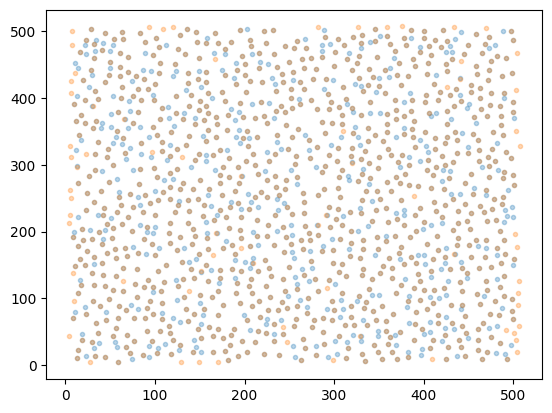

In [11]:
i = next(it)
plt.plot(*(my_res[my_res[:, 0] == i][:, -2:].T), ".", alpha = 0.3)
plt.plot(*tp_res[tp_res["frame"] == i][["y", "x"]].to_numpy().T, ".", alpha = 0.3)

In [57]:
my_df

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,9.744718,447.681702,677.319092
3,0,11.185135,227.674576,701.138489
4,0,10.446445,301.558044,608.553589
...,...,...,...,...
2419702,1999,497.840515,152.824646,1080.536743
2419703,1999,499.340942,244.843887,617.429443
2419704,1999,501.152466,178.034744,757.847717
2419705,1999,498.707764,188.581314,846.363647


In [60]:
it = next(range(100))

TypeError: 'range' object is not an iterator

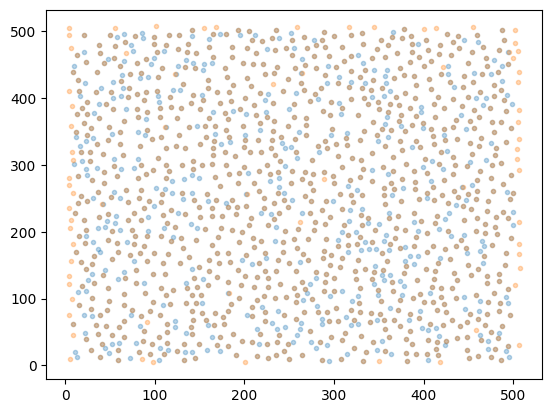

In [59]:
plt.plot(*coords(my_df[my_df["frame"] == next(it)]), "C0.", alpha = 0.3)
plt.plot(*coords(tp_res[tp_res["frame"] == 0]), "C1.", alpha = 0.3)

In [43]:
my_res[my_res[:, 0] == 0]

array([[   0.      , 1064.4476  ,    8.86707 ,   61.27686 ],
       [   0.      ,  993.4631  ,    9.230811,  438.9425  ],
       [   0.      ,  677.3191  ,    9.744718,  447.6817  ],
       ...,
       [   0.      ,  408.12558 ,  500.14667 ,  210.24208 ],
       [   0.      ,  464.3428  ,  499.46933 ,  229.10504 ],
       [   0.      ,  942.12463 ,  499.90485 ,  258.43118 ]],
      dtype=float32)

In [52]:
my_df[my_df["frame"] == 0]

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,9.744718,447.681702,677.319092
3,0,11.185135,227.674576,701.138489
4,0,10.446445,301.558044,608.553589
...,...,...,...,...
1206,0,498.052063,355.679932,802.113403
1207,0,498.293976,392.127533,709.902344
1208,0,500.146667,210.242081,408.125580
1209,0,499.469330,229.105042,464.342804
